# Qualitative Reasoning ("qualreas")

The Python module, <b>qualreas</b>, provides a framework for working with the class of <b>Relation Algebras</b> like [Allen's Algebra of Time Intervals](https://en.wikipedia.org/wiki/Allen%27s_interval_algebra) and the [Region Connection Calculus (RCC)](https://en.wikipedia.org/wiki/Region_connection_calculus).  Specifically, <i>qualreas</i> provides a representation of <b>Constraint Networks</b> where the nodes represent <b>Entities</b> (Spatial, Temporal, or whatever) and the edges are labelled with <b>Relation Sets</b> (<i>relsets</i>) that represent spatio-temporal constraints between the entities.

The constraint networks in qualreas can be <b>propagated</b> to achieve <b>path consistency</b> and they can be "factored" into <b>consistent singleton networks</b>.

Algebras and Networks in qualreas can be read from, or written to, <b>JSON</b> or Python dictionary formats.

## Table of Contents
* [How do I get set up?](#setup)
    * [Testing the Installation](#test_install)
* [Repository Description](#repo_desc)
* [References](#refs)
* [EXAMPLES](#examples)
    * [Imports](#imports)
    * [Paths to Network & Algebra](#paths)
    * [Constraint Network in JSON Format](#network_format)
    * [Instantiate the Constraint Network Object](#instantiate)
    * [Summarize the Network](#summarize)
    * [Get Entity (Network Node)](#nodes)
    * [Get Edge by Tail & Head Node IDs](#edges)
    * [The Algebra "Inside" the Network](#algebra)
    * [Perform Constraint Propagation](#prop)
    * [Singleton Labelings of a Network](#labelings)
    * [An Example of Temporal Reasoning](#temporal)
    * [Converting Networks to/from Other Formats](#other_formats)
        * [Network to Dictionary](#net_to_dict)
        * [Dictionary to Network](#dict_to_net)
        * [Network to JSON](#net_to_json)
            * [Network to JSON File](#net_to_json_file)
            * [Network to JSON String](#net_to_json_str)

## How do I get set up? <a class="anchor" id="setup"></a>

With respect the Python packages that <b>qualreas</b> depends on, here are the imports from the top of the source code file, <i>qualreas.py</i>:

* from bitsets import bitset, bases  (https://bitsets.readthedocs.io/en/stable/)
* import os
* import json
* import random
* import string
* import networkx as nx  (https://networkx.github.io/)
* from functools import reduce
* from collections import abc, OrderedDict
* import numpy as np

All but one of the dependencies, above, will be taken care of if the [Anaconda Python distribution for individuals](https://www.anaconda.com/products/individual) is used.

The one additional dependency required is <b>bitsets</b>.  The [bitsets package](https://bitsets.readthedocs.io/en/stable/#) is not available in the Anaconda distribution, but it can be easily added by executing the following command:

> pip install bitsets

Then, use <b>git</b> to clone the <b>qualreas</b> respository.

### Testing the installation <a class="anchor" id="test_install"></a>

Setup an environment variable, <b>PYPROJ</b>, that points to the directory containing <b>qualreas</b>.

Then <b>cd</b> into the directory, <b>PYPROJ/qualreas/Source</b>, and execute the following command:

> python qualreas.py

This test will generate output that ends with the words, END OF TESTS.

## Repository Description <a class="anchor" id="repo_desc"></a>

This is a brief description of the contents of each directory in this repository.

There is a lot here that is old and even obsolete.  The important directories for now are: <b>Algebras, Networks, Notebooks, Papers, and Sources</b>.  Because much has been in flux, testing & documentation has mostly been done using the notebooks (Jupyter notebooks), but not all of the notebooks have been kept up-to-date. This readme is one of the notebooks, exported to <i>markdown (md).</i>

* Algebras -- Relation Algebras in JSON format
* Docs -- INCOMPLETE (Don't look in here)
* Images -- What the title says
* LICENSE -- same
* Misc -- Assorted junk (Don't look in here)
* Networks -- Constraint Networks in JSON format
* Notebooks -- Jupyter Notebooks in wildly varying conditions (old, new, obsolete)
*Ontologies -- The .ttl file updates the W3C.org ontology of time to correspond to the Extended_Linear_Interval_Algebra [Reich 1994]
* Papers -- A collection of papers from the relevant literature
* README.md -- This file
* Source -- Two files. The one that matters is "qualreas.py"
* Tests -- NCOMPLETE (Don't look in here)
* Trash -- For when I'm too paranoid to delete something I don't really need
* output_13_0.png -- A small figure used in the README


## References <a class="anchor" id="refs"></a>

1. ["Maintaining Knowledge about Temporal Intervals" by James F. Allen](https://cse.unl.edu/~choueiry/Documents/Allen-CACM1983.pdf) - Allen's original paper (PDF)
1. [Allen's Interval Algebra](https://www.ics.uci.edu/~alspaugh/cls/shr/allen.html) or [here](https://thomasalspaugh.org/pub/fnd/allen.html) - summarizes Allen's algebra of proper time intervals
1. ["Intervals, Points, and Branching Time" by A.J. Reich](https://www.researchgate.net/publication/220810644_Intervals_Points_and_Branching_Time) - basis for the point & branching time extensions to Allen's algebra

## EXAMPLES <a class="anchor" id="examples"></a>

In the following Jupyter Notebook examples, <b>two different types</b> of contraint algebras are demonstrated:
1. The spatial constraint algebra, [Region Connection Calculus 8 (RCC8)](https://en.wikipedia.org/wiki/Region_connection_calculus)
1. The temporal interval & point algebra defined by Reich in ["Intervals, Points, and Branching Time", 1994](https://www.researchgate.net/publication/220810644_Intervals_Points_and_Branching_Time)

The examples provide brief demonstrations of a <i>qualreas</i> <b>Constraint Network</b> can be...
* represented in JSON or Python dictionary formats
* instantiated from a JSON file or Python dictionary
* serialized to a JSON file/string or Python dictionary
* summarized
* propagated
* queried for details about node and edge attributes
* used to generate all consistent singleton labellings when multiple constraints (relations) are involved

A brief look at Algebras and their components and methods is provided also.

## Imports <a class="anchor" id="imports"></a>

In [1]:
import qualreas as qr
import os
from IPython.display import Image

## Paths to Network & Algebra <a class="anchor" id="paths"></a>

To begin, we will instantiate a Constraint Network and it's corresponding Algebra from two JSON files.

Each are kept in separate directories, 'Networks' and 'Algebras', within a top-level 'qualreas' directory, with the full path defined here using an environment variable:

In [2]:
qr_path = os.path.join(os.getenv('PYPROJ'), 'qualreas')

Once defined, an Algebra's JSON format should remain unchanged. The name of the Algebra used by a Network can then be stored in the Network's definition (in JSON) regardless of where the Network's JSON file resides.  So, we only need provide the path to the directory containing Algebra files:

In [3]:
alg_dir = os.path.join(qr_path, "Algebras")

Networks, on the other hand, could be numerous and change often.  So, we need to provide the full path to the Network's JSON file.

In [4]:
rcc8_file = os.path.join(qr_path, "Networks", "rcc8_example.json")

## Constraint Network in JSON Format <a class="anchor" id="network_format"></a>

Here's what a network looks like in JSON format.

A node is represented as a list of two things:
1. Node ID (i.e., Node Name)
1. List of ontology classes the node belongs to (e.g., "ProperInterval", "Region")

> NOTE: Networks that are based on simple relation algebras, such as Allen's Interval Algebra and the Region Connection Calculus, only involve relations among <i>entities</i> that are all from the same ontology class, such as Proper Time Intervals or Spatial Regions.  So, the <b>ontology classes of entities being related by the relations</b> does not need to be considered when, for example, composing relations.  However, when ontology classes are integrated, such as Proper Time Intervals and Time Points, then the ontology classes of the entities being related become important.

An edge is represented as a list of three things, representing a directed edge, labeled with a constraint:
1. Tail Node ID
1. Head Node ID
1. Constraint

See graphical depiction below:

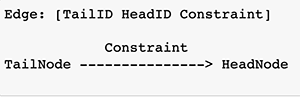

In [5]:
Image("Images/Edge_Notation_Meaning.png", width=300, height=100)

The network, shown in JSON format below, is the example from the [Wikipedia page on the Region Connection Calculus (RCC8)](https://en.wikipedia.org/wiki/Region_connection_calculus). The URL is also in the "description" field of the JSON format below.

In [6]:
!cat {rcc8_file}

{
    "name": "Wikipedia RCC8 Example",
    "algebra": "RCC8_Algebra",
    "abbreviations": {"dec": "DC|EC"},
    "description": "See https://en.wikipedia.org/wiki/Region_connection_calculus#Examples",
    "nodes": [
        ["House1", ["Region"]],
        ["House2", ["Region"]],
        ["Property1", ["Region"]],
        ["Property2", ["Region"]],
        ["Road", ["Region"]]
    ],
    "edges": [
        ["House1", "House2", "DC"],
        ["House1", "Property1", "TPP|NTPP"],
        ["House1", "Property2", "dec"],
        ["House1", "Road", "EC"],
        ["House2", "Property1", "dec"],
        ["House2", "Property2", "NTPP"],
        ["House2", "Road", "EC"],
        ["Property1", "Property2", "dec"],
        ["Road", "Property1"],
        ["Road", "Property2"]
    ]
}

NOTES:
1. The Wikipedia page on RCC8 represents disjunctions of constraints as sets, e.g., {DC, EC}, whereas qualreas represents this with the string "DC|EC".  Constraint sets represent disjunctions of relation statements, e.g., (Tail DC|EC Head) <==> (Tail DC Head) OR (Tail EC Head).
1. For convenience, constraints can be abbreviated using a dictionary of abbreviations.  For example, the constraint "DC|EC", above, is abbreviated as "dec".  By the way, internally, the qualreas module stores and operates on constraint sets as [bitsets](https://bitsets.readthedocs.io/en/stable/).
1. No constraints are given for the Road-to-Property1 or Road-to-Property2 edges.  The meaning then is that all RCC8 relations are possible for those two edges.  This can be seen in the first summary of the network farther below.
1. The Network object in qualreas is a subclass of [networkx.digraph](https://networkx.github.io/documentation/stable/reference/classes/digraph.html), which has functionality for loading/saving from/to JSON format. However, the JSON functionality in NetworkX is not easy to read, nor is it compact, and it is awkward to associate an Algebra with a Network using those formats.  So, the bespoke JSON format, described in this notebook, was developed for <i>qualreas</i>.

## Instantiate the Constraint Network Object <a class="anchor" id="instantiate"></a>

In [7]:
rcc8_net = qr.Network(algebra_path=alg_dir, json_file_name=rcc8_file)

The printed representation of a network provides its name and associated algebra:

In [8]:
print(rcc8_net)

<Network--Wikipedia RCC8 Example--RCC8_Algebra>


## Summarize the Network <a class="anchor" id="summarize"></a>

Below is a summary of the Network Object just instantiated.

The format is:
* Network Name: Number of Nodes, Number of Edges
* Algebra Name
* Tail_ID1: Class List
    * => Head_ID1: Constraint1
    * => Head_ID2: Constraint2
    * ...
* and so on ...

In [9]:
rcc8_net.summary(show_all=True)


Wikipedia RCC8 Example: 5 nodes, 25 edges
  Algebra: RCC8_Algebra
  House1:['Region']
    => House1: EQ
    => House2: DC
    => Property1: NTPP|TPP
    => Property2: DC|EC
    => Road: EC
  House2:['Region']
    => House2: EQ
    => House1: DC
    => Property1: DC|EC
    => Property2: NTPP
    => Road: EC
  Property1:['Region']
    => Property1: EQ
    => House1: NTPPI|TPPI
    => House2: DC|EC
    => Property2: DC|EC
    => Road: DC|EC|EQ|NTPP|NTPPI|PO|TPP|TPPI
  Property2:['Region']
    => Property2: EQ
    => House1: DC|EC
    => House2: NTPPI
    => Property1: DC|EC
    => Road: DC|EC|EQ|NTPP|NTPPI|PO|TPP|TPPI
  Road:['Region']
    => Road: EQ
    => House1: EC
    => House2: EC
    => Property1: DC|EC|EQ|NTPP|NTPPI|PO|TPP|TPPI
    => Property2: DC|EC|EQ|NTPP|NTPPI|PO|TPP|TPPI


Notice that, in the network summary above, even edges between an entity and itself are included (e.g., House1 --> House1, with constraint EQ). The relation on such an edge will always be the equality relation(s) for whatever ontology class(es) the entity belongs to.  These edges are included in constraint propagation so that ontology classes are properly accounted for.

Also, the summary above shows all possible connections between nodes, including converses, which is somewhat redundant.  That is, if we know that X r Y, then we can infer that Y converse(r) X.  To see a more compact representation that lists just one link per node pair, leave the argument, <i>show_all</i>, at its default setting of <i>False</i>, as shown below.

In [10]:
rcc8_net.summary()


Wikipedia RCC8 Example: 5 nodes, 25 edges
  Algebra: RCC8_Algebra
  House1:['Region']
    => House1: EQ
    => House2: DC
    => Property1: NTPP|TPP
    => Property2: DC|EC
    => Road: EC
  House2:['Region']
    => House2: EQ
    => Property1: DC|EC
    => Property2: NTPP
    => Road: EC
  Property1:['Region']
    => Property1: EQ
    => Property2: DC|EC
    => Road: DC|EC|EQ|NTPP|NTPPI|PO|TPP|TPPI
  Property2:['Region']
    => Property2: EQ
    => Road: DC|EC|EQ|NTPP|NTPPI|PO|TPP|TPPI
  Road:['Region']
    => Road: EQ


The next two sections show how to obtain specific information about network nodes ("entities") and edges.

### Get Entity (Network Nodes) <a class="anchor" id="nodes"></a>

<b>get_entity</b> returns an entity object (e.g., TemporalEntity, SpatialEntity). Use the object's methods to access it's attributes.

In [11]:
entity = rcc8_net.get_entity("House1")
entity

SpatialEntity(['Region'] 'House1')

In [12]:
entity.name

'House1'

In [13]:
entity.classes

['Region']

### Get Edge by Tail & Head Node IDs <a class="anchor" id="edges"></a>

Given a Tail ID and Head ID, <b>get_edge</b> returns an edge in the form of a tuple of three things, in order: (Tail Node ID, Head Node ID, Constraint)

In [14]:
edge = rcc8_net.get_edge("Property1", "Road")
edge

('Property1', 'Road', 'DC|EC|EQ|NTPP|NTPPI|PO|TPP|TPPI')

<b>get_constraint</b> takes the same inputs, but returns only the constraint for that edge.

In [15]:
rcc8_net.get_constraint("Property1", "Road")

'DC|EC|EQ|NTPP|NTPPI|PO|TPP|TPPI'

By the way, the Network method, <b>set_constraint</b>, can be used to set or change the constraint on an edge.  Setting the constraint on an edge, [Tail, Head], will automatically, set the converse constraint on the edge, [Head, Tail]. Always run the <b>propogate</b> method on a Network after setting/changing constraints.

### The Algebra "Inside" the Network <a class="anchor" id="algebra"></a>

<b>WARNING</b>: There really should be no reason for messing around with the algebra that a network is based on.  But we'll take a look at one here, just so we can see that it actually exists.

So, to begin, we'll use an accessor to obtain the algebra, then we'll examine the algebra a bit.

In [16]:
rcc8 = rcc8_net.algebra
print(rcc8)

<RCC8_Algebra: Region Connection Calculus 8 Algebra>


Here are all of the algebra's elements:

In [17]:
rcc8.elements

relset(['DC', 'EC', 'EQ', 'NTPP', 'NTPPI', 'PO', 'TPP', 'TPPI'])

The print representation of relsets is more compact and convenient:

In [18]:
print(rcc8.elements)

DC|EC|EQ|NTPP|NTPPI|PO|TPP|TPPI


Here's an example summary of an individual element:

In [19]:
rcc8.element_summary('NTPP')

                  Symbol: NTPP
                    Name: NonTangentialProperPart
                  Domain: ['Region']
                   Range: ['Region']
                Converse: NonTangentialProperPartInverse
           Is Reflexive?: False
           Is Symmetric?: False
          Is Transitive?: True
Is an Equality Relation?: False


We can create relsets from lists of element names:

In [20]:
rs1 = rcc8.relset(["DC", "EC"])
rs1

relset(['DC', 'EC'])

In [21]:
rs2 = rcc8.relset(["NTPP"])
rs2

relset(['NTPP'])

Again, the relset print representation is more compact:

In [22]:
print(f"rs1 = {rs1}")
print(f"rs2 = {rs2}")

rs1 = DC|EC
rs2 = NTPP


Relsets can also be created from the relset print representation:

In [23]:
rcc8.relset('DC|EC')

relset(['DC', 'EC'])

In [24]:
print(rcc8.relset('DC|EC'))

DC|EC


In the literature on Relation Algebras, the semicolon (";") is used to represent the composition operator (also called <i>multiplication</i> in many papers).  In <i>qualreas</i>, composition can only be performed on relsets.  Here's an example:

In [25]:
print(f"{rs1} ; {rs2} = {rcc8.compose(rs1, rs2)}")

DC|EC ; NTPP = DC|EC|NTPP|PO|TPP


The meaning of the composition example, above, is that if S, R, and T are spatial entities (regions) per the RCC-8 algebra, then
> if [(S DC R) or (S EC R)]
> <p>and (R NTPP T)</p>
> <p>then either (S DC T) or (S EC T) or (S NTPP T) or (S PO T) or (S TPP T)</p>

Now, back to <b>Constraint Networks</b>.

## Perform Constraint Propagation <a class="anchor" id="prop"></a>

After propagation, note the change in the constraints between the Road and the two Properties.

In [26]:
rcc8_net.propagate()
rcc8_net.summary()


Wikipedia RCC8 Example: 5 nodes, 25 edges
  Algebra: RCC8_Algebra
  House1:['Region']
    => House1: EQ
    => House2: DC
    => Property1: NTPP|TPP
    => Property2: DC|EC
    => Road: EC
  House2:['Region']
    => House2: EQ
    => Property1: DC
    => Property2: NTPP
    => Road: EC
  Property1:['Region']
    => Property1: EQ
    => Property2: DC|EC
    => Road: EC|PO
  Property2:['Region']
    => Property2: EQ
    => Road: PO|TPPI
  Road:['Region']
    => Road: EQ


For easier comparison, the printout below is in a format similar to that found on the [Wikipedia example page](https://en.wikipedia.org/wiki/Region_connection_calculus#Examples):

In [27]:
road = "Road"
prop1 = "Property1"
prop2 = "Property2"

print(f"{road} {rcc8_net.get_constraint(road, prop1)} {prop1}")
print(f"{road} {rcc8_net.get_constraint(road, prop2)} {prop2}")

Road EC|PO Property1
Road PO|TPP Property2


## Singleton Labelings of a Network <a class="anchor" id="labelings"></a>

The constraints on the edges in a network can often involve multiple relations, representing disjunctions of single constraints. If we derive a network from that, where each constraint involves only a single relation, it is called a <b>Singleton Labelling</b>. It is possible for a singleton labeling to be inconsistent.  So, it's of great interest to derive <b>all possible consistent singleton labellings</b>.

Here, we'll compute all of the singleton labelings of the Wikipedia RCC8 example, presented above.

To begin, look again at the summary of that network:

In [28]:
rcc8_net.summary()


Wikipedia RCC8 Example: 5 nodes, 25 edges
  Algebra: RCC8_Algebra
  House1:['Region']
    => House1: EQ
    => House2: DC
    => Property1: NTPP|TPP
    => Property2: DC|EC
    => Road: EC
  House2:['Region']
    => House2: EQ
    => Property1: DC
    => Property2: NTPP
    => Road: EC
  Property1:['Region']
    => Property1: EQ
    => Property2: DC|EC
    => Road: EC|PO
  Property2:['Region']
    => Property2: EQ
    => Road: PO|TPPI
  Road:['Region']
    => Road: EQ


Not counting converses--which, conveniently, are not shown in the summary, above--there are 5 links that have multiple relations (e.g., [House1, Property1, NTPP|TPP]).  Since there are 2 relations on each of these 5 edges, if we breakout the network into all possible singleton labelings we have 2^5 = 32 possible networks.  And it's possible that not all of the 32 networks will be consistent.  In fact, as shown below, only 9 of the 32 possible singleton labelings are consistent.

In [29]:
singleton_labelings = rcc8_net.all_singleton_labelings()

In [30]:
print(f"There are {len(singleton_labelings)} singleton labelings of Wikipedia's RCC8 example")

There are 32 singleton labelings of Wikipedia's RCC8 example


In [31]:
consistent_singleton_labelings = rcc8_net.consistent_singleton_labelings()

In [32]:
print(f"But there are only {len(consistent_singleton_labelings)} consistent singleton labelings.")

But there are only 9 consistent singleton labelings.


Here are summaries of all 9 singleton labelings:

In [33]:
count = 1
for network in consistent_singleton_labelings:
    print("-------------------------")
    print(f" Singleton Labeling #{count}")
    print("-------------------------")
    network.summary()
    count += 1
    print(" ")

-------------------------
 Singleton Labeling #1
-------------------------

Wikipedia RCC8 Example: 5 nodes, 25 edges
  Algebra: RCC8_Algebra
  House1:['Region']
    => House1: EQ
    => House2: DC
    => Property1: TPP
    => Property2: EC
    => Road: EC
  House2:['Region']
    => House2: EQ
    => Property1: DC
    => Property2: NTPP
    => Road: EC
  Property1:['Region']
    => Property1: EQ
    => Property2: EC
    => Road: PO
  Property2:['Region']
    => Property2: EQ
    => Road: PO
  Road:['Region']
    => Road: EQ
 
-------------------------
 Singleton Labeling #2
-------------------------

Wikipedia RCC8 Example: 5 nodes, 25 edges
  Algebra: RCC8_Algebra
  House1:['Region']
    => House1: EQ
    => House2: DC
    => Property1: TPP
    => Property2: EC
    => Road: EC
  House2:['Region']
    => House2: EQ
    => Property1: DC
    => Property2: NTPP
    => Road: EC
  Property1:['Region']
    => Property1: EQ
    => Property2: EC
    => Road: EC
  Property2:['Region']
    => Pr

## An Example of Temporal Reasoning <a class="anchor" id="temporal"></a>

Here we'll use the temporal interval & point algebra, <b>Extended_Linear_Interval_Algebra</b>, defined by Reich in ["Intervals, Points, and Branching Time", 1994](https://www.researchgate.net/publication/220810644_Intervals_Points_and_Branching_Time)

This algebra extends Allen's algebra of <b>Proper Time Intervals</b> to include <b>Time Points</b>, so those two different ontology classes are permitted.

The relation, "PF", is "PointFinishes", "PS" is "PointStarts", and "PE" is "PointEquals".  "PFI" & "PSI" are the converses of "PF" and "PS", respectively.

For example,
* <i>MondayMidnight PF Monday</i>
* <i>MondayMidnight PS Tuesday</i>
* <i>MondayMidnight PE MondayMidnight</i>

In the following constraint network (in dictionary form) we create four temporal entities.  We've also specified the ontology classes the entities are allowed to belong to:
* Monday a ProperInterval
* MondayMidnight a ProperInterval or Point
* Tuesday a ProperInterval
* MondayPM a ProperInterval

And we create three constraints between the temporal entities:
* Monday <b>M</b> Tuesday
* MondayMidnight <b>PF</b> Monday
* MondayPM <b>F</b> Monday

In [34]:
time_net_dict = {
    'name': 'Simple Temporal Constraint Network',
    'algebra': 'Extended_Linear_Interval_Algebra',
    'description': 'A simple example of a Network of Time Points integrated with Time Intervals',
    'nodes': [
        ['Monday', ['ProperInterval']],
        ['MondayMidnight', ['ProperInterval', 'Point']],
        ['Tuesday', ['ProperInterval']],
        ['MondayPM', ['ProperInterval']]
    ],
    'edges': [
        ['Monday', 'Tuesday', 'M'],
        ['MondayMidnight', 'Monday', 'PF'],
        ['MondayPM', 'Monday', 'F']
    ]
}

Now we'll use the dictionary to instantiate a Constraint Network Object

In [35]:
time_net = qr.Network(algebra_path=alg_dir, network_dict=time_net_dict)

print(time_net.description)

time_net.summary()

A simple example of a Network of Time Points integrated with Time Intervals

Simple Temporal Constraint Network: 4 nodes, 10 edges
  Algebra: Extended_Linear_Interval_Algebra
  Monday:['ProperInterval']
    => Monday: E
    => Tuesday: M
    => MondayMidnight: PFI
    => MondayPM: FI
  Tuesday:['ProperInterval']
    => Tuesday: E
  MondayMidnight:['ProperInterval', 'Point']
    => MondayMidnight: E|PE
  MondayPM:['ProperInterval']
    => MondayPM: E


And now, we'll propagate the network's constraints and summarize the result, showing all edges.

In [36]:
ok = time_net.propagate()

if ok:
    print("The network is consistent.  Here's a summary:")
    time_net.summary(show_all=True)
else:
    print("The network is inconsistent.")

The network is consistent.  Here's a summary:

Simple Temporal Constraint Network: 4 nodes, 16 edges
  Algebra: Extended_Linear_Interval_Algebra
  Monday:['ProperInterval']
    => Monday: E
    => Tuesday: M
    => MondayMidnight: PFI
    => MondayPM: FI
  Tuesday:['ProperInterval']
    => Tuesday: E
    => Monday: MI
    => MondayMidnight: PSI
    => MondayPM: MI
  MondayMidnight:['Point']
    => MondayMidnight: PE
    => Monday: PF
    => Tuesday: PS
    => MondayPM: PF
  MondayPM:['ProperInterval']
    => MondayPM: E
    => Monday: F
    => Tuesday: M
    => MondayMidnight: PFI


Note that with regard to the point, <i>MondayMidnight</i> as defined in <b>time_net_dict</b>, above, we only specified:

><i>MondayMidnight PF Monday</i>

That is, <i>MondayMidnight</i> is the end point (<i>PointFinishes</i>) of the interval, <i>Monday</i>.

After propagation, we've inferred that:

><i>MondayMidnight PS Tuesday</i>

That is, <i>MondayMidnight</i> is the begin point (<i>PointStarts</i>) of the interval, <i>Tuesday</i>.

We've also inferred the corresponding converses of these statements (i.e., using the relations <i>PFI</i> and <i>PSI</i>).

Finally, although we defined <i>MondayMidnight</i> as being either a <i>ProperInterval</i> or a <i>Point</i>, after propagation it is determined that it can only be a <i>Point</i>.

## Converting Networks to/from Other Formats <a class="anchor" id="other_formats"></a>

In this section, we show how to convert Networks to/from JSON or Python dictionary formats.

### Network to Dictionary <a class="anchor" id="net_to_dict"></a>

Note: The only differences between JSON and the dictionary output by <b>to_dict</b> are the single quotes instead of double quotes required by JSON.

In [37]:
rcc8_net_dict = rcc8_net.to_dict()

rcc8_net_dict

{'name': 'Wikipedia RCC8 Example',
 'algebra': 'RCC8_Algebra',
 'description': 'See https://en.wikipedia.org/wiki/Region_connection_calculus#Examples',
 'nodes': [['House1', ['Region']],
  ['House2', ['Region']],
  ['Property1', ['Region']],
  ['Property2', ['Region']],
  ['Road', ['Region']]],
 'edges': [['House1', 'House2', 'DC'],
  ['House1', 'Property1', 'NTPP|TPP'],
  ['House1', 'Property2', 'DC|EC'],
  ['House1', 'Road', 'EC'],
  ['House2', 'Property1', 'DC'],
  ['House2', 'Property2', 'NTPP'],
  ['House2', 'Road', 'EC'],
  ['Property1', 'Property2', 'DC|EC'],
  ['Property1', 'Road', 'EC|PO'],
  ['Property2', 'Road', 'PO|TPPI']]}

### Dictionary to Network <a class="anchor" id="dict_to_net"></a>

Instantiating a Network from a dictionary is similar to using the JSON format.  Although it is not shown below, we can define and use abbreviations for constraints, and we can leave the constraints off of edge definitions to indicate that all relations are possible.

In [38]:
rcc8_net_from_dict = qr.Network(algebra_path=alg_dir, network_dict=rcc8_net_dict)

print(rcc8_net_from_dict)

rcc8_net_from_dict.summary(show_all=False)

<Network--Wikipedia RCC8 Example--RCC8_Algebra>

Wikipedia RCC8 Example: 5 nodes, 25 edges
  Algebra: RCC8_Algebra
  House1:['Region']
    => House1: EQ
    => House2: DC
    => Property1: NTPP|TPP
    => Property2: DC|EC
    => Road: EC
  House2:['Region']
    => House2: EQ
    => Property1: DC
    => Property2: NTPP
    => Road: EC
  Property1:['Region']
    => Property1: EQ
    => Property2: DC|EC
    => Road: EC|PO
  Property2:['Region']
    => Property2: EQ
    => Road: PO|TPPI
  Road:['Region']
    => Road: EQ


### Network to JSON <a class="anchor" id="net_to_json"></a>

A simple way to serialize a network in JSON format is to first convert it to a dictionary using <b>to_dict</b> and then use <b>json.dump()</b> or <b>json.dumps()</b> to write it out to a file or convert it to a string, respectively.

However, either way, the resulting file or string are not pretty printed.

#### Network to JSON File <a class="anchor" id="net_to_json_file"></a>

In [39]:
import json

rcc8_json_file = os.path.join(qr_path, "Networks", "rcc8_test1.json")

with open(rcc8_json_file, "w") as fout:
    json.dump(rcc8_net_dict, fout)

In [40]:
!cat {rcc8_json_file}

{"name": "Wikipedia RCC8 Example", "algebra": "RCC8_Algebra", "description": "See https://en.wikipedia.org/wiki/Region_connection_calculus#Examples", "nodes": [["House1", ["Region"]], ["House2", ["Region"]], ["Property1", ["Region"]], ["Property2", ["Region"]], ["Road", ["Region"]]], "edges": [["House1", "House2", "DC"], ["House1", "Property1", "NTPP|TPP"], ["House1", "Property2", "DC|EC"], ["House1", "Road", "EC"], ["House2", "Property1", "DC"], ["House2", "Property2", "NTPP"], ["House2", "Road", "EC"], ["Property1", "Property2", "DC|EC"], ["Property1", "Road", "EC|PO"], ["Property2", "Road", "PO|TPPI"]]}

#### Network to JSON String <a class="anchor" id="net_to_json_str"></a>

In [41]:
json.dumps(rcc8_net_dict)

'{"name": "Wikipedia RCC8 Example", "algebra": "RCC8_Algebra", "description": "See https://en.wikipedia.org/wiki/Region_connection_calculus#Examples", "nodes": [["House1", ["Region"]], ["House2", ["Region"]], ["Property1", ["Region"]], ["Property2", ["Region"]], ["Road", ["Region"]]], "edges": [["House1", "House2", "DC"], ["House1", "Property1", "NTPP|TPP"], ["House1", "Property2", "DC|EC"], ["House1", "Road", "EC"], ["House2", "Property1", "DC"], ["House2", "Property2", "NTPP"], ["House2", "Road", "EC"], ["Property1", "Property2", "DC|EC"], ["Property1", "Road", "EC|PO"], ["Property2", "Road", "PO|TPPI"]]}'